In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,9)
plt.style.use('bmh')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
import seaborn as sns

In [2]:
# Load Dataset
def preprocess(file):
    data = pd.read_csv(file)
    HUElec = pd.melt(data, id_vars=["Date"], var_name='time')
    HUElec['time'] = pd.to_timedelta(HUElec['time'].apply(lambda t: f"{t[:5]}:00")) - timedelta(minutes=30)
    HUElec['Date'] = pd.to_datetime(HUElec['Date'], format="%m/%d/%Y")
    HUElec['Datetime'] = HUElec['Date'] + HUElec['time']
    HUElec = HUElec.set_index('Datetime')
    HUElec = HUElec.drop(['Date', 'time'], axis=1).sort_index()

    return HUElec

In [32]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\QBElec.csv'

data = preprocess(file)

data.fillna(method='ffill', inplace=True)

df = data.resample(rule='m').mean()

df.head()

,value
Datetime,
2008-03-31,64.077986
2008-04-30,70.179363
2008-05-31,65.880629
2008-06-30,66.411449
2008-07-31,62.712981


In [33]:
# Create lagged dataset
values = pd.DataFrame(df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
dataframe.head(5)

,t-1,t+1
0,NaN,64.077986
1,64.077986,70.179363
2,70.179363,65.880629
3,65.880629,66.411449
4,66.411449,62.712981


In [34]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.7)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [35]:
# persistence model
def model_persistence(x):
	return x

In [36]:
from sklearn.metrics import *

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
# test_score = mean_squared_error(test_y, predictions)

print('RMSE: ', np.sqrt(mean_squared_error(test_y, predictions)))
print('MSE: ', mean_squared_error(test_y, predictions))
print('MAE: ', mean_absolute_error(test_y, predictions))
print('R2: ', r2_score(test_y, predictions))

RMSE:  6.036504306277114
MSE:  36.43938423970214
MAE:  3.735535103572389
R2:  0.5735093532174023


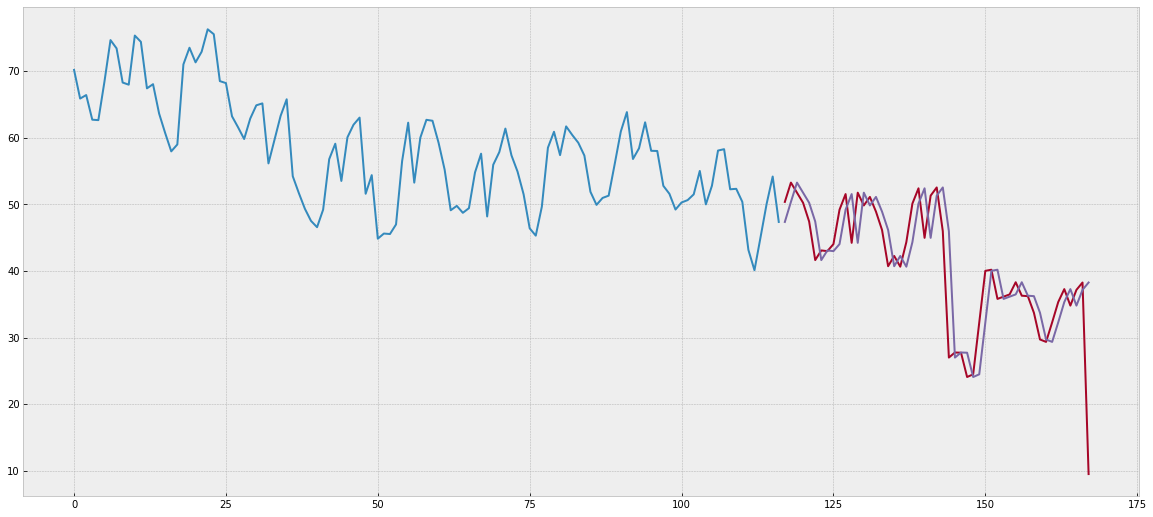

In [37]:
# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()